price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Mean Price: 4,766,729.25
Median Price: 4,340,000.00
Mode Price: 3,500,000.00
Standard Deviation of Price: 1,870,439.62

Price Percentiles:
0.25    3430000.0
0.50    4340000.0
0.75    5740000.0
Name: price, dtype: float64


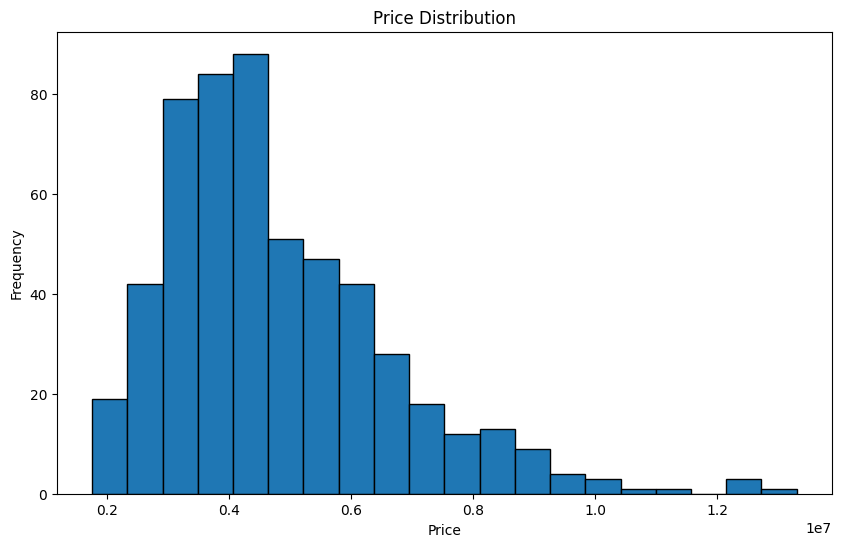

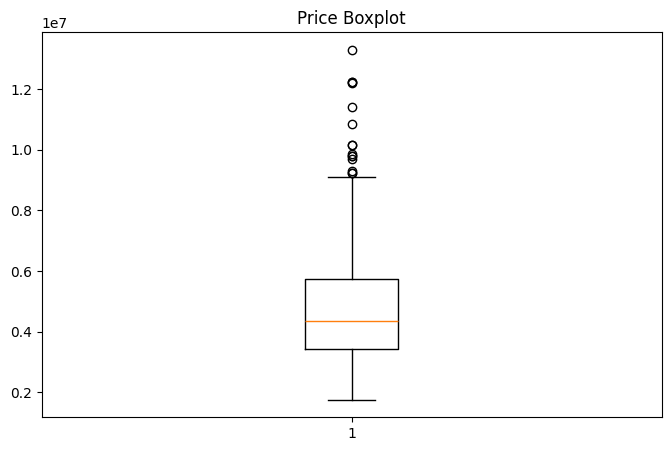


Simple Linear Regression:
R² Score: 0.27
MAE: 1474748.13
RMSE: 1917103.70


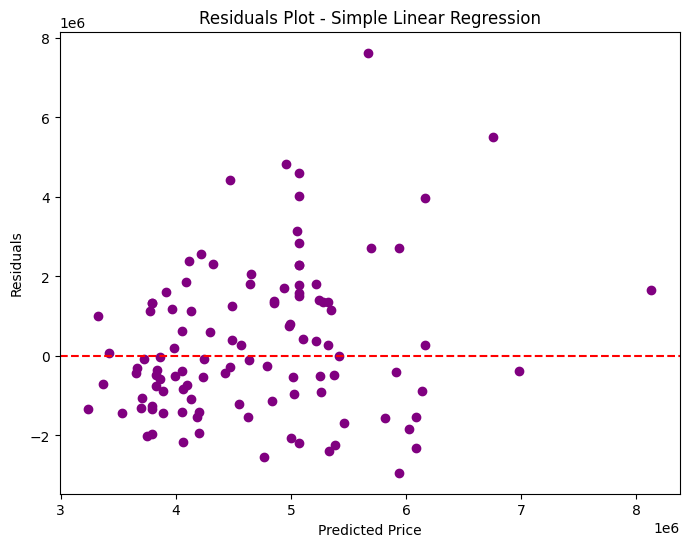

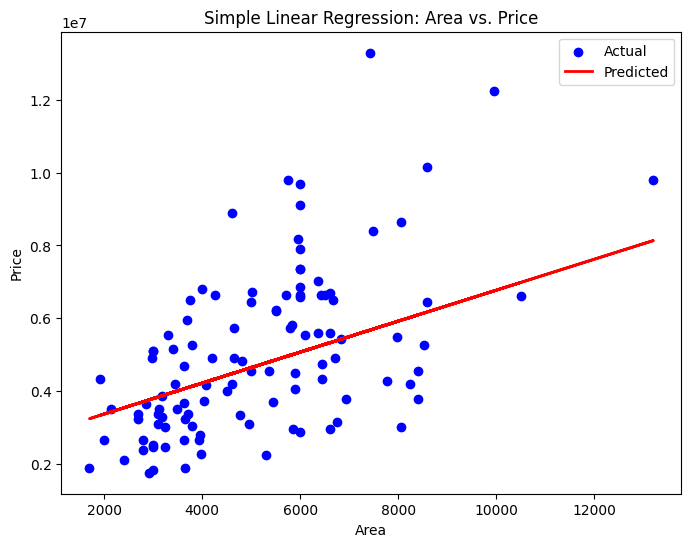


Polynomial Regression (Degree 2):
R² Score: 0.30
MAE: 1435042.81
RMSE: 1887327.30


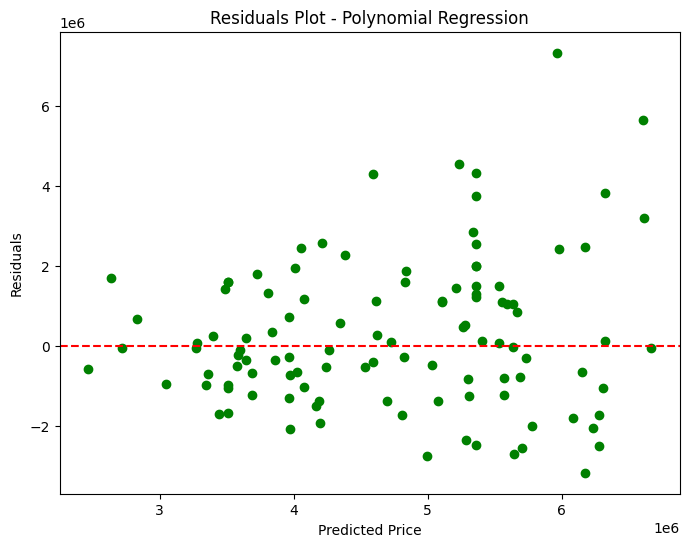

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


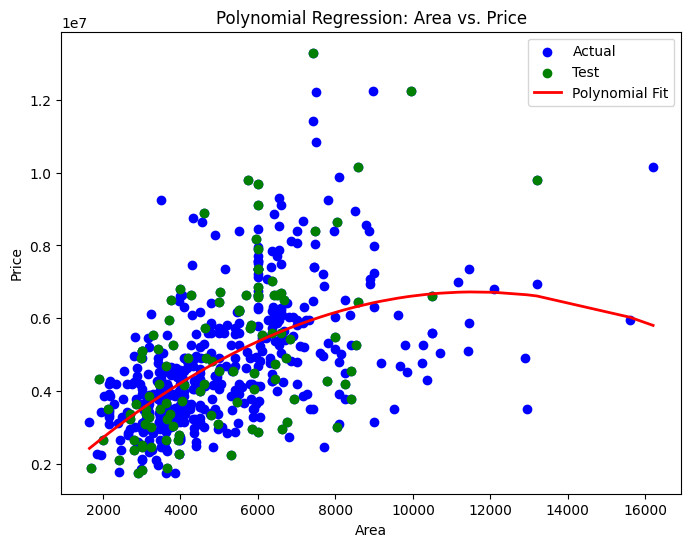


Linear Regression Coefficients: [425.72984194]
Linear Regression Intercept: 2512254.2639593435

Multiple Regression:
R² Score: 0.65
MAE: 970043.40
RMSE: 1324506.96


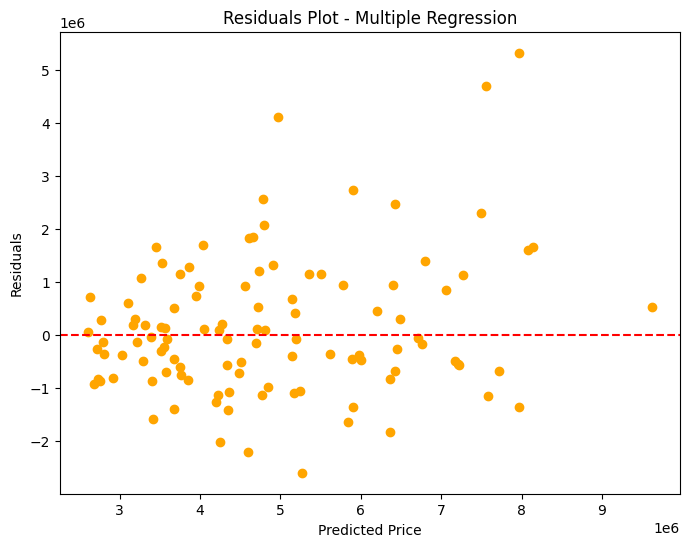


Multiple Linear Regression Coefficients:
                            Feature    Coefficient
2                         bathrooms  521879.027748
0                              area  519552.416340
9               airconditioning_yes  365157.393851
3                           stories  349251.438906
10                     prefarea_yes  266656.351993
12     furnishingstatus_unfurnished -192015.917982
4                           parking  192005.953667
7                      basement_yes  187067.803214
8               hotwaterheating_yes  149862.702991
5                      mainroad_yes  128498.628215
6                     guestroom_yes   88768.667686
11  furnishingstatus_semi-furnished  -62837.321865
1                          bedrooms   57349.559419

Model Performance Summary:
                   Model  R² Score           MAE          RMSE
0          Simple Linear  0.272879  1.474748e+06  1.917104e+06
1  Polynomial (Degree 2)  0.295290  1.435043e+06  1.887327e+06
2        Multiple Linear  0

In [1]:
# 📦 Step 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\Anthony\Housing.csv")

# Check for missing values
print(df.isnull().sum())

# Mean, Median, Mode
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"\nMean Price: {mean_price:,.2f}")
print(f"Median Price: {median_price:,.2f}")
print(f"Mode Price: {mode_price:,.2f}")

# Standard Deviation
std_price = df['price'].std()
print(f"Standard Deviation of Price: {std_price:,.2f}")

# Percentiles
percentiles = df['price'].quantile([0.25, 0.5, 0.75])
print("\nPrice Percentiles:")
print(percentiles)

# Plot price distribution
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for price
plt.figure(figsize=(8,5))
plt.boxplot(x=df['price'])
plt.title('Price Boxplot')
plt.show()

# Simple Linear Regression
X = df[['area']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluation
r2_lr = r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nSimple Linear Regression:")
print(f"R² Score: {r2_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")

# Residuals Plot
residuals_lr = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals_lr, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Simple Linear Regression')
plt.show()

# Scatter Plot with Regression Line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs. Price')
plt.legend()
plt.show()

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))

print("\nPolynomial Regression (Degree 2):")
print(f"R² Score: {r2_poly:.2f}")
print(f"MAE: {mae_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")

# Residuals Plot
residuals_poly = y_test_poly - y_pred_poly
plt.figure(figsize=(8,6))
plt.scatter(y_pred_poly, residuals_poly, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Polynomial Regression')
plt.show()

# Plot Polynomial Fit
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X_test, y_test, color='green', label='Test')
X_sorted = np.sort(X.values.flatten())
X_sorted_poly = poly.transform(X_sorted.reshape(-1,1))
y_poly_pred = poly_model.predict(X_sorted_poly)
plt.plot(X_sorted, y_poly_pred, color='red', linewidth=2, label='Polynomial Fit')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Polynomial Regression: Area vs. Price')
plt.legend()
plt.show()

# Print linear model coefficients
print("\nLinear Regression Coefficients:", lr_model.coef_)
print("Linear Regression Intercept:", lr_model.intercept_)

# Multiple Linear Regression
# Prepare X_multi by dropping the target and converting categorical variables to dummies
X_multi = pd.get_dummies(df.drop('price', axis=1), drop_first=True)
y_multi = df['price']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_multi_scaled = scaler.fit_transform(X_train_multi)
X_test_multi_scaled = scaler.transform(X_test_multi)

multi_model = LinearRegression()
multi_model.fit(X_train_multi_scaled, y_train_multi)
y_pred_multi = multi_model.predict(X_test_multi_scaled)

r2_multi = r2_score(y_test_multi, y_pred_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test_multi, y_pred_multi))

print("\nMultiple Regression:")
print(f"R² Score: {r2_multi:.2f}")
print(f"MAE: {mae_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")

# Residuals Plot
residuals_multi = y_test_multi - y_pred_multi
plt.figure(figsize=(8,6))
plt.scatter(y_pred_multi, residuals_multi, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Multiple Regression')
plt.show()

# Print Multiple Regression Coefficients
feature_names = X_multi.columns
coefficients = multi_model.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nMultiple Linear Regression Coefficients:")
print(coef_df)

# Summary Table
summary_df = pd.DataFrame({
    'Model': ['Simple Linear', 'Polynomial (Degree 2)', 'Multiple Linear'],
    'R² Score': [r2_lr, r2_poly, r2_multi],
    'MAE': [mae_lr, mae_poly, mae_multi],
    'RMSE': [rmse_lr, rmse_poly, rmse_multi]
})

print("\nModel Performance Summary:")
print(summary_df)
